In [2]:
# External Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Internal Libraries
from config import *

In [60]:
performance_log = pd.read_csv(DATA_DIR/'training'/'performance_benchmark'/'fine_grain_training.dat', sep=';')
number_of_sample = 64

result_name = f'Test {number_of_sample} varians w 0.2% sample each on exp mass predict {8*number_of_sample} random ext samples'
epochs = [250, 100, 50]
batches = [32, 16, 4]

In [61]:
# Loading the result
result = pd.read_csv(DATA_DIR/'output'/f'{result_name}.dat', sep=';')
rms_deviation = np.sqrt((result['Difference']**2).mean())
std_difference = result['Difference'].std()

execution_time = performance_log.query(f'training_name=="{result_name}"')['training_time'].iloc[0]
print(f'rms_deviation: {rms_deviation}')
print(f'std: {std_difference}')
print(f'execution_time: {execution_time}')

result

rms_deviation: 77.77972560187128
std: 64.60078618202618
execution_time: 198.8759639263153


,Z,N,BSk24,Prediction,Difference
0,8.0,8.0,-2.776788,0.479048,-3.255836
1,8.0,8.0,-2.688061,0.468634,-3.156695
2,8.0,8.0,-2.718659,0.473006,-3.191665
3,8.0,8.0,-2.781688,0.494865,-3.276553
4,8.0,8.0,-2.762683,0.473006,-3.235689
...,...,...,...,...,...
3289595,110.0,249.0,556.585800,266.490300,290.095505
3289596,110.0,249.0,554.732400,266.492280,288.240121
3289597,110.0,249.0,557.909200,266.501560,291.407644
3289598,110.0,249.0,557.103600,266.501430,290.602166


Text(0, 0.5, 'Z')

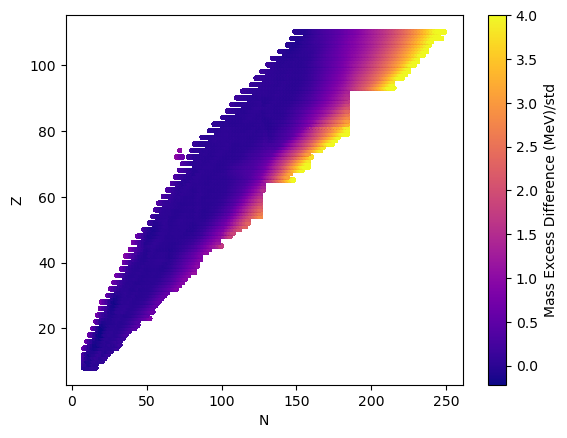

In [62]:
# Plot the mass excess difference across the nuclear landscape
diff_o_std = result['Difference']/std_difference
v_min, v_max = -4, 4

plt.scatter(result['N'], result['Z'], c=np.clip(diff_o_std, v_min, v_max), cmap='plasma', s=5)

plt.colorbar(label='Mass Excess Difference (MeV)/std')
plt.xlabel('N')
plt.ylabel('Z')

Text(0, 0.5, 'log_10(Val_Loss)')

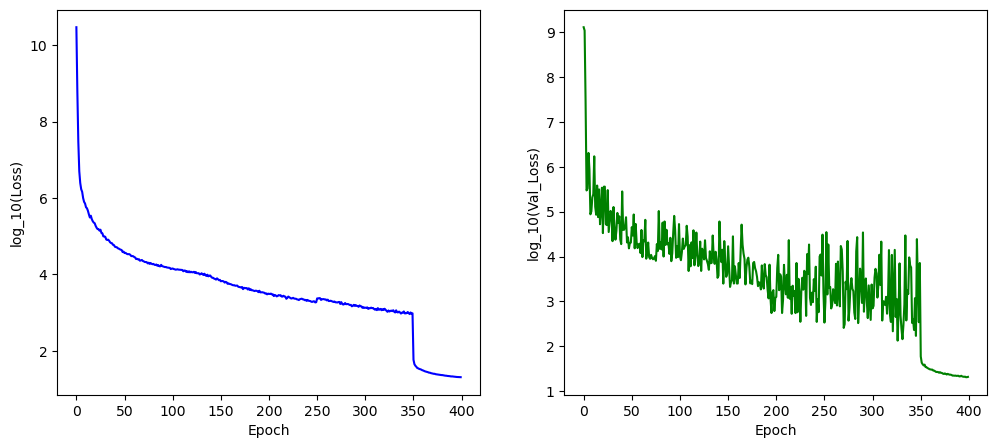

In [63]:
# Loss analyisis
# Combine the loss from several steps
loss_dir = DATA_DIR/'training'/'loss' 
loss_file = [loss_dir/f'{result_name}.batch={batches[i]}.epoch={epochs[i]}.stage{i+1}.loss.dat' for i in range(3)]
val_loss_file = [loss_dir/f'{result_name}.batch={batches[i]}.epoch={epochs[i]}.stage{i+1}.val_loss.dat' for i in range(3)]

loss_data = [np.loadtxt(file) for file in loss_file]
val_loss_data = [np.loadtxt(file) for file in val_loss_file]

loss_arr = [item for sublist in loss_data for item in sublist]
val_loss_arr = [item for sublist in val_loss_data for item in sublist]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].plot(np.log(loss_arr), label='loss', color='blue')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('log_10(Loss)')

axes[1].plot(np.log(val_loss_arr), label='cos(x)', color='green')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('log_10(Val_Loss)')

Text(0.5, 0, 'Number of varian')

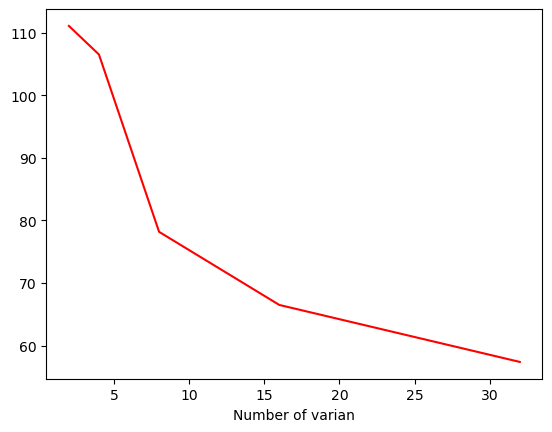

In [64]:
test_param = [2,4,8,16,32]
mass_table = [f'Test {number_of_sample} varians w 0.2% sample each on exp mass predict {2*number_of_sample} random ext samples' for number_of_sample in test_param]
rms_deviation_arr = []
std_difference_arr = []
execution_time_arr = []

for data in mass_table:
    result = pd.read_csv(DATA_DIR/'output'/f'{data}.dat', sep=';')
    rms_deviation = np.sqrt((result['Difference']**2).mean())
    std_difference = result['Difference'].std()
    execution_time = performance_log.query(f'training_name=="{data}"')['training_time'].iloc[0]

    rms_deviation_arr.append(rms_deviation)
    std_difference_arr.append(std_difference)
    execution_time_arr.append(execution_time)

plt.plot(test_param, rms_deviation_arr, color='red')
plt.xlabel('Number of varian')

Text(0, 0.5, 'std difference')

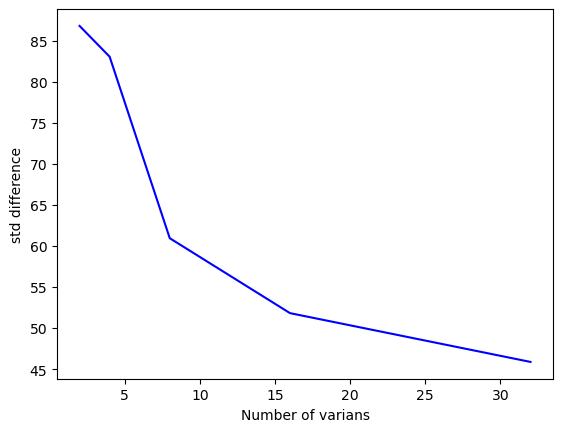

In [65]:
plt.plot(test_param, std_difference_arr, color='blue')
plt.xlabel('Number of varians')
plt.ylabel('std difference')

Text(0, 0.5, 'execution time')

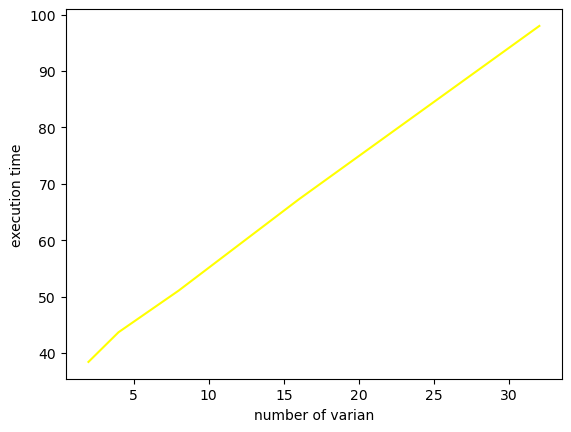

In [66]:

plt.plot(test_param, execution_time_arr, color='yellow')
plt.xlabel('number of varian')
plt.ylabel('execution time')

In [ ]:
from model import *
from input import *
from training import *
import random
from output import *

training_label = 'Test 128 varians w 0.2% sample each on exp mass predict 1024 random ext samples'
N_input=31
varian_train_to_predict_ratio = 8

model = wouter_model(N_input, 'adadelta')
model.load_weights('/mnt/Data/2_Area_Learn/Master Degree/2 Area_Courses/Master Thesis/1_Project/4_BSk24_Emu/data/training/weight_best/Test 128 varians w 0.2% sample each on exp mass predict 1024 random ext samples.batch=4.epoch=50.stage3.weights.h5')
number_of_sample = 128
varian_number = random_integers = random.sample(range(1, 1000), number_of_sample * varian_train_to_predict_ratio)
selected_varian = select_varian(varian_number, data='ext')
Z_bsk24_varian, N_bsk24_varian, m_bsk24_varian, params_bsk24_varian = extract_varian_data(selected_varian)

test_input, N_test_input = modified_wouter(Z_bsk24_varian, N_bsk24_varian, m_bsk24_varian, params_bsk24_varian)
generate_mass_table(model, test_input, training_label)

/opt/miniconda3/envs/tf/lib/python3.10/site-packages/keras/src/saving/saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'adadelta', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


NameError: name 'varian_train_to_predict_ratio' is not defined